In [1]:
import squarify
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv("vendas2018_2023.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'vendas2018_2023.csv'

In [ ]:
df.shape

(35762, 10)

In [ ]:
df.head()

,id,data_venda,cliente,vendedor,produto,categoria,fornecedor,quantidade,valor_venda,valor_custo
0,1,2021-10-08,Victor Sousa,RODRIGO BIO,CAMA CASAL,MOVEIS,BRASIL MADEIRAS,2,1000.0,752.0
1,2,2023-03-07,Giovana Cardoso,PEDRO NUNES,BARCO DE PEDRA,LIVROS,EDITORA AMAZONIA,2,37.0,20.0
2,3,2022-07-24,Matheus Ferreira,MARCELO WITEMBERG,RIO DE JANEIRO / LIMA,PASSAGENS,LINHAS LATINAS DE AVIÃ•ES,1,1900.0,1570.0
3,4,2022-01-07,Amanda Cavalcanti,FABIO AUGUSTO,LEITOR DE CARTOES MULTILASER,INFORMATICA,MULTILASER,2,24.0,11.0
4,5,2020-03-09,Vinícius Silva,RODRIGO BIO,RIO DE JANEIRO / MIAMI,PASSAGENS,AMERICA LINES EXPRESS,4,1900.0,1763.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35762 entries, 0 to 35761
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           35762 non-null  int64  
 1   data_venda   35762 non-null  object 
 2   cliente      35762 non-null  object 
 3   vendedor     35762 non-null  object 
 4   produto      35762 non-null  object 
 5   categoria    35762 non-null  object 
 6   fornecedor   35762 non-null  object 
 7   quantidade   35762 non-null  int64  
 8   valor_venda  35762 non-null  float64
 9   valor_custo  35762 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.7+ MB


In [ ]:
df['data_venda'] = pd.to_datetime(df['data_venda'])

In [ ]:
df['data_venda'] = df['data_venda'].dt.date

In [ ]:
data_mais_recente = df['data_venda'].max()


df_agg = df.groupby(['id']).agg({
    'data_venda': lambda x: (data_mais_recente - x.max()).days,  
    'valor_venda': 'sum',  
    'id': 'size' 
}).rename(columns={'data_venda': 'Recencia', 'valor_venda': 'Monetizacao', 'id': 'Frequencia'})


In [ ]:
df_agg.rename(columns = {'data_venda':'Recency','id':'Frequency', 'valor_venda':'Monetary'}, inplace=True)

In [ ]:
df_agg.head()

,Recencia,Monetizacao,Frequencia
id,,,
1,810,1000.0,1
2,295,37.0,1
3,521,1900.0,1
4,719,24.0,1
5,1388,1900.0,1


In [ ]:
df_agg.isna().any()

Recencia       False
Monetizacao    False
Frequencia     False
dtype: bool

In [ ]:
df_agg['Recencia'].describe()

count    35762.000000
mean      1096.049438
std        632.516519
min          0.000000
25%        552.000000
50%       1097.000000
75%       1645.000000
max       2186.000000
Name: Recencia, dtype: float64

In [ ]:
df_agg['Frequencia'].value_counts()

Frequencia
1    35762
Name: count, dtype: int64

In [ ]:
df_agg['Monetizacao'].describe()

count    35762.000000
mean       992.565908
std       1162.046301
min         24.000000
25%        109.000000
50%        400.000000
75%       1800.000000
max       5400.000000
Name: Monetizacao, dtype: float64

In [ ]:
df_agg.head()

,Recencia,Monetizacao,Frequencia
id,,,
1,810,1000.0,1
2,295,37.0,1
3,521,1900.0,1
4,719,24.0,1
5,1388,1900.0,1


In [ ]:
r_labels = range(4,0,-1)

In [ ]:
r_groups = pd.qcut(df_agg['Recencia'], q=4, labels = r_labels)

In [ ]:
r_groups.value_counts()

Recencia
4    8947
3    8941
2    8938
1    8936
Name: count, dtype: int64

In [ ]:
df_agg = df_agg.assign(R= r_groups.values)

In [ ]:
df_agg.sample(10)

,Recencia,Monetizacao,Frequencia,R
id,,,,
30549,791,99.0,1,3
22294,1181,450.0,1,2
16588,1208,198.0,1,2
35005,1720,430.0,1,1
23023,1592,3100.0,1,2
16260,353,2700.0,1,4
1798,828,145.0,1,3
32242,1726,500.0,1,1
26962,1390,2200.0,1,2


In [ ]:
df_agg['Frequencia'].describe()

count    35762.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Frequencia, dtype: float64

In [ ]:
f_labels = range(1,3)

In [ ]:
def pct_rank_qcut(series, n):
    edges = pd.Series([float(i)/n for i in range(n+1)])
    f = lambda x: (edges>=x).values.argmax()
    return series.rank(pct = 1).apply(f)

In [ ]:
f_groups = pct_rank_qcut(df_agg['Frequencia'], 2)


In [ ]:
f_groups.value_counts()

Frequencia
2    35762
Name: count, dtype: int64

In [ ]:
df_agg = df_agg.assign(F = f_groups.values)

In [ ]:
df_agg.sample(10)

,Recencia,Monetizacao,Frequencia,R,F
id,,,,,
3210,2015,59.0,1,1,2
10700,901,145.0,1,3,2
11574,1209,98.0,1,2,2
19053,1681,110.0,1,1,2
28248,1359,90.0,1,2,2
14997,601,145.0,1,3,2
31680,1954,300.0,1,1,2
14390,1842,3800.0,1,1,2
9120,100,160.0,1,4,2


In [ ]:
m_labels = range(1,5)

In [ ]:
m_groups = pd.qcut(df_agg['Monetizacao'], q=4, labels = m_labels)

In [ ]:
m_groups.value_counts()

Monetizacao
3    9473
1    9049
2    8876
4    8364
Name: count, dtype: int64

In [ ]:
df_agg = df_agg.assign(M = m_groups.values)

In [ ]:
d_le = LabelEncoder()

In [ ]:
df_agg['R'] = d_le.fit_transform(df_agg['R'])+1
df_agg['M'] = d_le.fit_transform(df_agg['M'])+1

In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35762 entries, 1 to 35762
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recencia     35762 non-null  int64  
 1   Monetizacao  35762 non-null  float64
 2   Frequencia   35762 non-null  int64  
 3   R            35762 non-null  int64  
 4   F            35762 non-null  int64  
 5   M            35762 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.9 MB


In [ ]:
df_agg['Score_RFM'] = df_agg[['R','F','M']].sum(axis = 1)

In [ ]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

In [ ]:
df_agg['Segmento_RFM'] = df_agg.apply(join_rfm, axis=1)

In [ ]:
df_agg['Segmento_RFM'] = df_agg.apply(join_rfm, axis=1)

In [ ]:
rfm_count_unique = df_agg.groupby('Segmento_RFM')['Segmento_RFM'].nunique()

In [ ]:
print(rfm_count_unique.sum())

16


In [ ]:
rfm = df_agg

In [ ]:
rfm['Segmento_RFM'] = rfm['Segmento_RFM'].astype(str).astype(int)

In [ ]:
rfm.describe()

,Recencia,Monetizacao,Frequencia,R,F,M,Score_RFM,Segmento_RFM
count,35762.000000,35762.000000,35762.0,35762.000000,35762.0,35762.000000,35762.000000,35762.000000
mean,1096.049438,992.565908,1.0,2.500503,2.0,2.479615,6.980119,272.529948
std,632.516519,1162.046301,0.0,1.118100,0.0,1.106095,1.579762,111.825286
min,0.000000,24.000000,1.0,1.000000,2.0,1.000000,4.000000,121.000000
25%,552.000000,109.000000,1.0,2.000000,2.0,1.000000,6.000000,221.000000
50%,1097.000000,400.000000,1.0,3.000000,2.0,2.000000,7.000000,321.000000
75%,1645.000000,1800.000000,1.0,4.000000,2.0,3.000000,8.000000,421.000000
max,2186.000000,5400.000000,1.0,4.000000,2.0,4.000000,10.000000,424.000000


In [ ]:
def rfm_level(df):
    if (df['Segmento_RFM'] >= 424 | (df['Score_RFM'] >= 9)):
        return 'Clientes VIP'
    
    elif ((df['Score_RFM'] >= 8) & (df['M'] == 4)):
        return 'Clientes leais que compram com frequência'
    
    elif ((df['Score_RFM'] >= 6) & (df['F'] >= 2)):
        return'clientes leais'
    
    elif ((df['Score_RFM'] <= 4) & (df['R'] == 1)):
        return 'Clientes quase perdidos'
    
    elif ((df['Segmento_RFM'] >= 221) & (df['Score_RFM'] >= 6)):
        return 'Potenciais clientes leais'
    
    elif ((df['Segmento_RFM'] >= 121) & (df['R'] == 1) | (df['Score_RFM'] ==5)):
        return 'Clientes que precisam de atenção'
    
    else:
        return 'Clientes perdidos'

In [ ]:
def rfm_action(df):
    if ((df['segmento_RFM'] >= 424) | (df['Score_RFM'] >= 9)):
        return 'Incentivos não relacionados a preços; Oferecer edição limitada e programas de fidelidade'
    
    elif ((df['Score_RFM'] >= 8) & (df['M'] ==4)):
        return 'Oferecer intens mais caros (upsell)'
    
    elif ((df['Score_FRM'] >= 6) & ( df['F'] >= 2)):
        return 'Oferecer programas de fidelidade e venda cruzada (Cross-sell)'
    
    elif ((df['Score_RFM'] <= 4) & (df['R'] == 1)):
        return 'Oferecer incentivos de preços agressivos'
    
    elif ((df['Segmento_RFM'] >= 221) | (df['Score_RFM'] >=6) ):
        return 'Recomendação de venda cruzada e cupons de desconto'
    
    elif (((df['Segmento_RFM'] >= 121) & (df['R'] == 1)) | (df['Score_RFM'] == 5)):
        return 'Incentivos de preço e oferta por tempo limitado'
    
    else:
        return 'Não gaste muito tentando readquirir esse cliente'

In [ ]:
rfm['Segmento de cliente'] = rfm.apply(rfm_level, axis=1)

In [ ]:
def rfm_action(segmento_rfm):
    if segmento_rfm >= 424:
        return 'Incentivos não relacionados a preços; Oferecer edição limitada e programas de fidelidade'
    elif segmento_rfm >= 8:
        return 'Promoções direcionadas'
    return 'Acompanhar e engajar'


In [ ]:
rfm['Marketing Action'] = rfm['Segmento_RFM'].apply(rfm_action)

In [ ]:
rfm['Segmento de cliente'].value_counts()

Segmento de cliente
clientes leais                               22623
Clientes leais que compram com frequência     6294
Clientes que precisam de atenção              4510
Clientes quase perdidos                       2335
Name: count, dtype: int64

In [ ]:
rfm.to_csv('rfm.csv')

In [ ]:
rfm_level_agg = rfm.groupby(['Segmento de cliente']).agg({
    'Recencia': 'mean', 
    'Frequencia': 'mean', 
    'Monetizacao': ['mean', 'count'], 
    'Marketing Action': 'unique'
}).round(1)


In [ ]:
rfm_level_agg = pd.DataFrame(rfm_level_agg)
rfm_level_agg = rfm_level_agg.reset_index()
rfm_level_agg

Segmento de cliente Recencia Frequencia Monetizacao  \
                                                 mean       mean        mean   
0  Clientes leais que compram com frequência    822.4        1.0      2829.1   
1                    Clientes quase perdidos   1914.1        1.0        67.1   
2           Clientes que precisam de atenção   1638.1        1.0       135.3   
3                             clientes leais    979.7        1.0       748.0   

                                           Marketing Action  
   count                                             unique  
0   6294  [Incentivos não relacionados a preços; Oferece...  
1   2335                           [Promoções direcionadas]  
2   4510                           [Promoções direcionadas]  
3  22623                           [Promoções direcionadas]

In [ ]:
print(rfm_level_agg.columns)


MultiIndex([('Segmento de cliente',       ''),
            (           'Recencia',   'mean'),
            (         'Frequencia',   'mean'),
            (        'Monetizacao',   'mean'),
            (        'Monetizacao',  'count'),
            (   'Marketing Action', 'unique')],
           )


In [ ]:
df.columns

Index(['id', 'data_venda', 'cliente', 'vendedor', 'produto', 'categoria',
       'fornecedor', 'quantidade', 'valor_venda', 'valor_custo'],
      dtype='object')

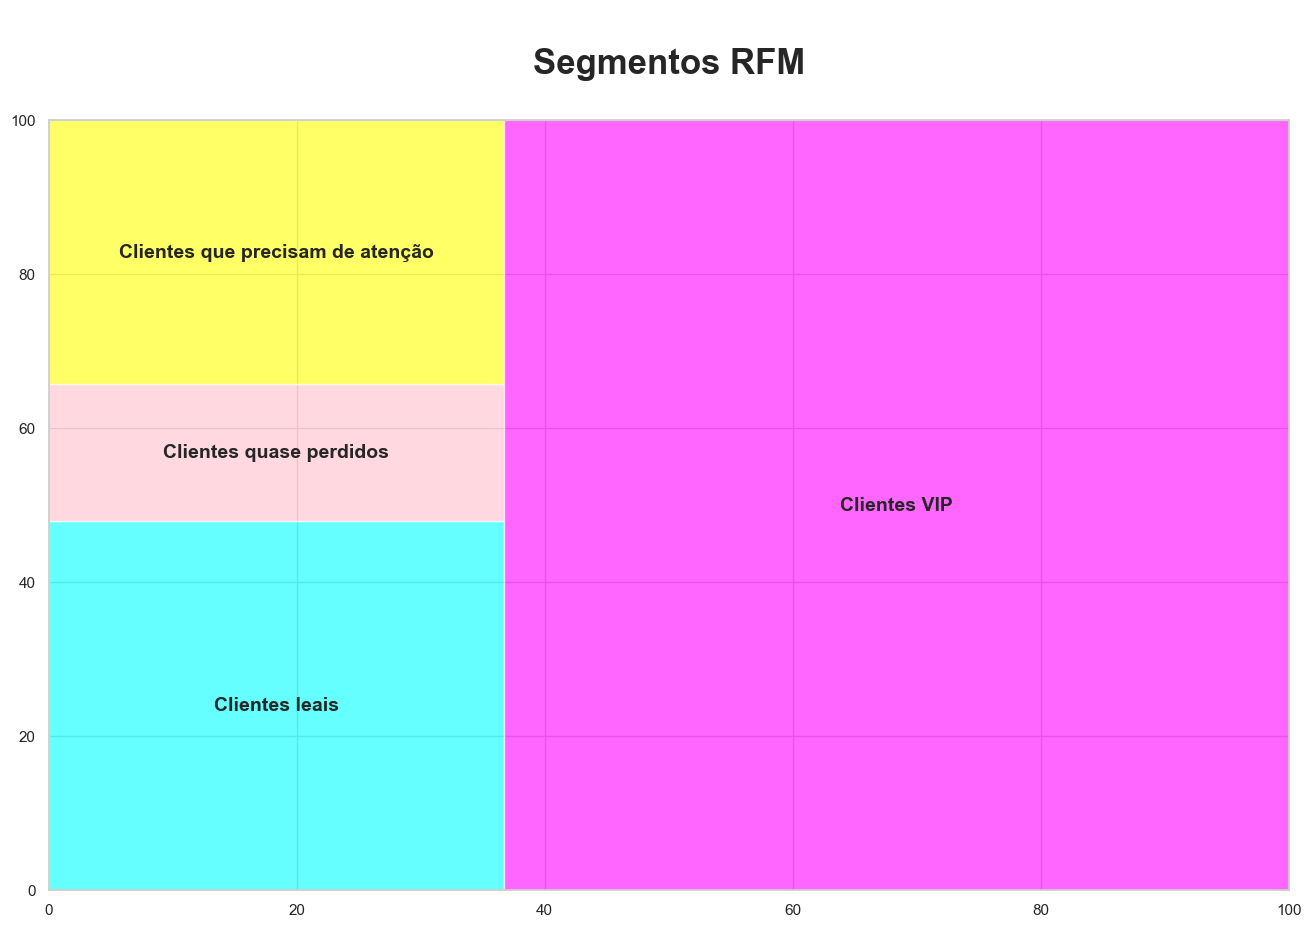

In [ ]:
rfm_level_agg.columns = ['SegmentoCliente', 'RecencyMean', 'FrequencyMean', 'MonetaryMean', 'count', 'MarketingAction']
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16,10)
sns.set(color_codes= True, style='whitegrid')
squarify.plot(
    sizes=rfm_level_agg['count'], 
    label=[
        'Clientes leais',
        'Clientes quase perdidos',
        'Clientes que precisam de atenção',
        'Clientes VIP'
    ], 
    alpha=.6,
    color=['cyan','pink','yellow','magenta'],
    text_kwargs={ 'fontsize': 14, 'weight': 'bold'}
)
plt.title('\nSegmentos RFM\n', fontsize=25, fontweight= 'bold')
plt.axis('on')
plt.show()

In [ ]:
fig = go.Figure(go.Treemap(
    labels=rfm_level_agg['SegmentoCliente'],
    parents=['Segmento de Cliente'] * len(rfm_level_agg),
    values=rfm_level_agg['count'],
    textfont=dict(
        color='black',
        family='Arial Black'
    ),
     marker=dict(colors=['cyan', 'yellow', 'orange', '#85C1E9'])
))

fig.show()